In [4]:
!pip install gensim transformers scikit-learn matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 74.3 MB/s eta 0:00:00


In [5]:
with open("diwali.txt", "r", encoding="utf-8") as f:
    text = f.read().lower()

print(text[:300])


diwali, also known as deepavali, is one of the most popular festivals celebrated in india and among indian communities around the world. it is called the festival of lights and symbolizes the victory of light over darkness, good over evil, and knowledge over ignorance. diwali is celebrated with gre


In [6]:
import re

clean_text = re.sub(r"[^a-z\s]", "", text)
clean_text = re.sub(r"\s+", " ", clean_text)

sentences = clean_text.split(".")
sentences = [s.strip().split() for s in sentences if s.strip()]

print(sentences[0][:10])

['diwali', 'also', 'known', 'as', 'deepavali', 'is', 'one', 'of', 'the', 'most']


In [7]:
from gensim.models import Word2Vec

w2v_model = Word2Vec(
    sentences,
    vector_size=50,
    window=5,
    min_count=1,
    workers=2
)

In [8]:
words = [
    "diwali", "festival", "lights", "india",
    "family", "joy", "darkness", "prosperity"
]

vectors = [w2v_model.wv[word] for word in words]

In [9]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(vectors)

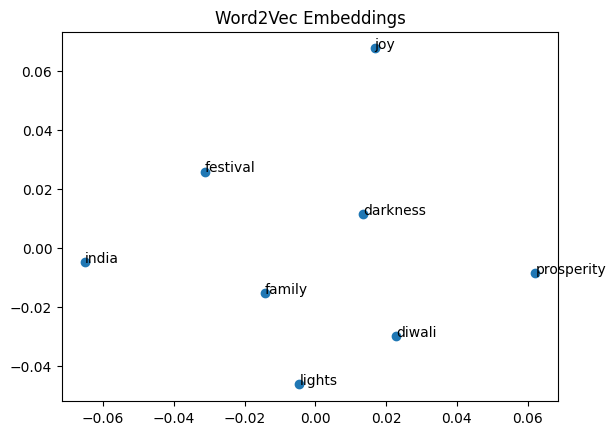

In [10]:
import matplotlib.pyplot as plt

plt.figure()
x = reduced_vectors[:, 0]
y = reduced_vectors[:, 1]

plt.scatter(x, y)

for i, word in enumerate(words):
    plt.text(x[i], y[i], word)

plt.title("Word2Vec Embeddings")
plt.show()

In [11]:
import torch
from transformers import AutoTokenizer, AutoModel

tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
model = AutoModel.from_pretrained("bert-base-uncased")
model.eval()

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSdpaSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False

In [12]:
sentence = "diwali is a festival of lights and joy"

inputs = tokenizer(sentence, return_tensors="pt")
with torch.no_grad():
    outputs = model(**inputs)

embeddings = outputs.last_hidden_state.squeeze(0)
tokens = tokenizer.convert_ids_to_tokens(inputs["input_ids"][0])

print(tokens)

['[CLS]', 'di', '##wal', '##i', 'is', 'a', 'festival', 'of', 'lights', 'and', 'joy', '[SEP]']


In [13]:
target_words = ["diwali", "festival", "lights", "joy"]

word_vectors = []
labels = []

for i, token in enumerate(tokens):
    if token in target_words:
        word_vectors.append(embeddings[i].numpy())
        labels.append(token)

In [14]:
pca = PCA(n_components=2)
reduced_bert = pca.fit_transform(word_vectors)

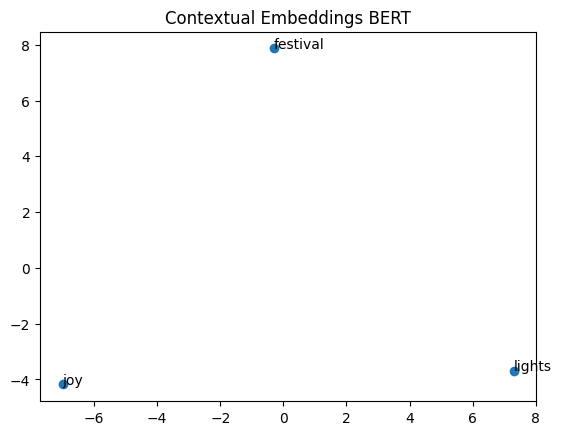

In [15]:
plt.figure()
x = reduced_bert[:, 0]
y = reduced_bert[:, 1]

plt.scatter(x, y)

for i, word in enumerate(labels):
    plt.text(x[i], y[i], word)

plt.title("Contextual Embeddings BERT")
plt.show()